#  Begin work on 10/6/17
# Imports

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import datetime
from astropy.table import Table
%matplotlib inline

# Initialize Simulation

In [2]:
sim = rebound.Simulation() #Create the simulation

sim.add("Sun", date = "2017-11-02 15:30") #Add the various bodies into the solar system
sim.add("Mercury", date = "2017-11-02 15:30")
sim.add("Venus", date = "2017-11-02 15:30")
sim.add("Earth", date = "2017-11-02 15:30")
sim.add("Mars", date = "2017-11-02 15:30")
sim.add("Jupiter", date = "2017-11-02 15:30")
sim.add("308635", date = "2017-11-02 15:30")


#fig = rebound.OrbitPlot(sim, slices=True, color=True,lim=2., limz=0.36, unitlabel="[AU]")


Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for '308635'... Found: 308635 (2005 YU55).


/Users/ke9885jd/anaconda3/lib/python3.6/site-packages/rebound/horizons.py:128: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


# Integrate Solar System Backward in Time

In [3]:
sim.dt = -0.00001 #Time step for integration
Noutputs = 10000 # Store postions of planets and asteroids at 1000 times during the interval 
year = 2 * np.pi #If we choose G = 1 (which REBOUND does), then one year = 2Pi
times = np.linspace(0, -10 * year, Noutputs) # An array of linearly spaced times
x = np.zeros((6, Noutputs)) #Empty array to store x positions
y = np.zeros((6, Noutputs)) #Empty array to store y positions

In [4]:
sim.integrator = "ias15" #One of many fine integrators to choose from
sim.move_to_com() #Move to COM frame
ps = sim.particles #Array of pointer. Changes as simulations runs


for i, time in enumerate(times): #Integrate and store positions in the originally created arrays
    sim.integrate(time)
    x[0][i] = ps[1].x #Mercury x
    y[0][i] = ps[1].y #Mercury y
    x[1][i] = ps[2].x #Venus x
    y[1][i] = ps[2].y #Venus y
    x[2][i] = ps[3].x #Earth x
    y[2][i] = ps[3].y #Earth y
    x[3][i] = ps[4].x #Mars x
    y[3][i] = ps[4].y #Mars y
    x[4][i] = ps[5].x #Jupiter x
    y[4][i] = ps[5].y #Jupiter y
    x[5][i] = ps[6].x #Asteroid x
    y[5][i] = ps[6].y #Asteroidy y
    

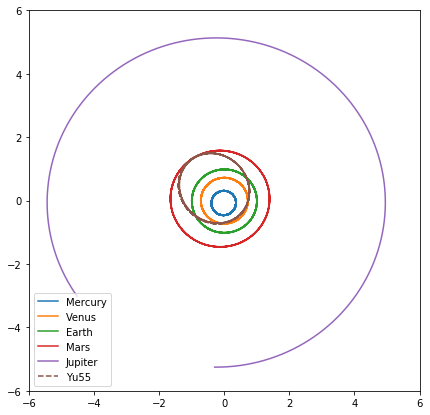

In [5]:
fig = plt.figure(figsize = (7, 7))  #Create a plot to show object orbits
ax = plt.subplot(111)
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
plt.plot(x[0], y[0], label='Mercury')
plt.plot(x[1], y[1], label='Venus')
plt.plot(x[2], y[2], label='Earth')
plt.plot(x[3], y[3], label='Mars')
plt.plot(x[4], y[4], label='Jupiter')
plt.plot(x[5], y[5], '--', label='Yu55')
plt.legend()
plt.savefig('OrbitWithoutForces201-11-02.png')
# The asteroid (brown orbit) interects the orbit of several planets. Plot closest approach to Earth below to see how
#close it gets

Minimum distance (0.002064 AU) occured at time: -5.983598 years.
2011-11-09 03:16:36.399640


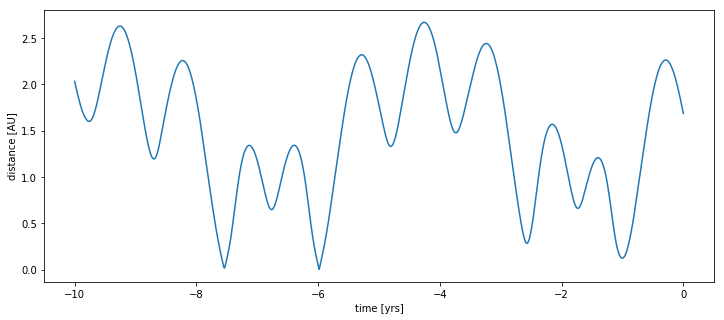

In [9]:
fig2 = plt.figure(figsize=(12,5))
ax2 = plt.subplot(111)
ax2.set_xlabel("time [yrs]")
ax2.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[5]-x[2])+np.square(y[5]-y[2]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

encounterdate = datetime.datetime(2017,11,2,15,30) + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("%Y-%m-%d %H:%M")
print(encounterdate)
plt.savefig('ClosestApproachWithoutForces2017-11-02.png')

# The closest approach does not appreciably change with solar raditaion accounted for.

In [10]:
xypostable = Table([x[5], y[5]], names=('x_pos', 'y_pos'))

In [11]:
xypostable.write('xypostable2017-11-02.csv')